# Based on the MV dataset, which Kpop group is the most prolific in terms of music videos releases?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'FTISLAND'),
  Text(1, 0, 'T-ARA'),
  Text(2, 0, 'SUPER JUNIOR'),
  Text(3, 0, "GIRLS' GENERATION"),
  Text(4, 0, 'TVXQ!'),
  Text(5, 0, 'BIGBANG'),
  Text(6, 0, 'SHINEE'),
  Text(7, 0, 'APINK'),
  Text(8, 0, 'CNBLUE'),
  Text(9, 0, 'MAMAMOO')])

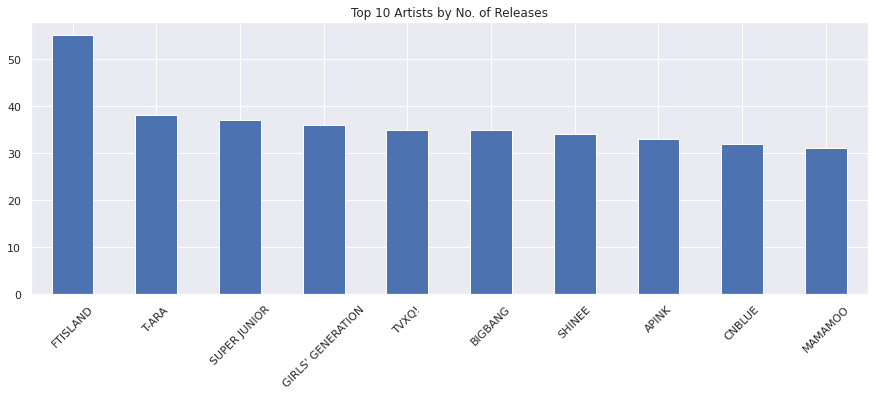

In [14]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('kpop_music_videos.csv')
df.drop_duplicates(inplace=True)

# Retain only the Boy or Girl group
boy_group = df['Type'] == 'Boy'
girl_group = df['Type'] == 'Girl'
new_df = df[boy_group | girl_group].sort_values('Artist')[['Artist', 'Release']]
new_df.dropna(subset = ['Release'], inplace=True)

# Make the lowercase artists to uppercase to be uniform
def all_upper(row):
    artist=row[0]
    return artist.upper()

new_df['Artist'] = new_df.apply(all_upper, axis=1)

top_artists = new_df['Artist'].value_counts()[:10]
top_artists.plot(kind='bar', title ="Top 10 Artists by No. of Releases", figsize=(15, 5))
plt.xticks(rotation=45)

# Which year had the most releases?

2019    502
2018    501
2017    469
2016    373
2015    316
Name: Date, dtype: int64


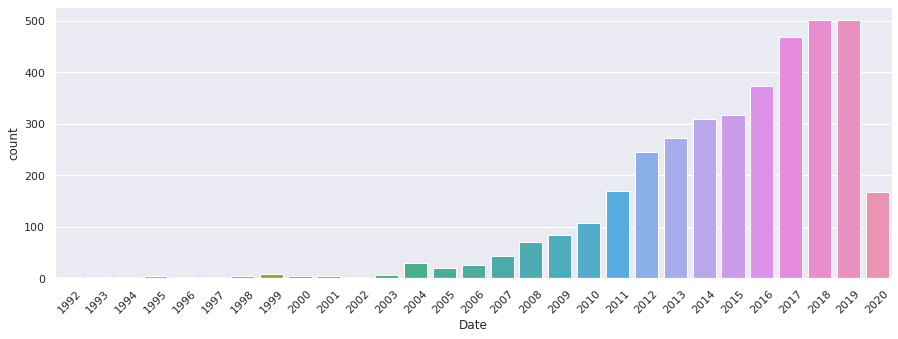

In [15]:
df = pd.read_csv('kpop_music_videos.csv', parse_dates=['Date'])
df.drop_duplicates(inplace=True)

new_df2 = df.sort_values('Date', ascending=False)[['Date', 'Release']]
new_df2.dropna(subset = ['Release'], inplace=True)
new_df2['Date'] = pd.DatetimeIndex(new_df2['Date']).year

sns.set(rc={'figure.figsize':(15,5)})
ax=sns.countplot(x='Date', data=new_df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

print(new_df2.Date.value_counts().head())

# In descending order, find the top 5 months that music videos are typically released (Average of months)

In [16]:
df = pd.read_csv('kpop_music_videos.csv', parse_dates=['Date'])
df.drop_duplicates(inplace=True)

new_df = df[['Date', 'Release']]
new_df = new_df.dropna(subset=['Release', 'Date'])

new_df['Date_Year'] = pd.DatetimeIndex(new_df['Date']).year
new_df['Date_Month'] = pd.DatetimeIndex(new_df['Date']).month

# The numerator / dividend in computing the average, how many times the month occurs
numerators = new_df['Date_Month'].value_counts()
numerators = numerators.to_frame()
numerators = numerators.sort_index(axis=0, ascending=False)
numerators = numerators.rename(columns={'Date_Month' : 'Numerators'})
numerators

,Numerators
12,213
11,347
10,335
9,267
8,331
7,355
6,292
5,337
4,351
3,307


In [17]:
# The denominator / divisor in computing the average, no. of years where that month occurs
new_df['Date'] = new_df['Date'].dt.strftime('%m-%Y-%d')
new_df = new_df.drop_duplicates(subset=['Date_Year', 'Date_Month'], keep='first')
new_df.sort_values('Date_Month').head(20)
denominators = new_df['Date_Month'].value_counts()
denominators = denominators.to_frame()
denominators = denominators.sort_index(axis=0, ascending=False)
denominators = denominators.rename(columns={'Date_Month' : 'Denominators'})
denominators

,Denominators
12,19
11,20
10,18
9,16
8,17
7,17
6,17
5,17
4,17
3,18


In [18]:
new_df = numerators.merge(denominators, left_index=True, right_index=True)
new_df

,Numerators,Denominators
12,213,19
11,347,20
10,335,18
9,267,16
8,331,17
7,355,17
6,292,17
5,337,17
4,351,17
3,307,18


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '7'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '8'),
  Text(4, 0, '1')])

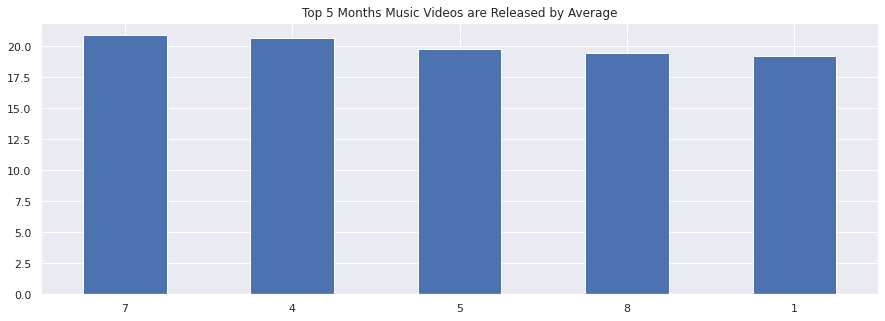

In [19]:
# Function to return the mean or average
def find_mean(row):
    num = row[0]
    den = row[1]
    return num/den

new_df = new_df.apply(find_mean, axis=1).sort_values(ascending=False)
new_df[:5].plot(kind='bar', title ="Top 5 Months Music Videos are Released by Average", figsize=(15, 5))
plt.xticks(rotation=0)

# Within the dataset, who is the oldest kpop idol?

In [20]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from datetime import datetime, date
import matplotlib.pyplot as plt

df = pd.read_csv('kpop_idols.csv')
df = df.drop_duplicates(subset = ["Stage Name", "Full Name"], keep="first")

# This function converts given "Date of Birth" to "Age"
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  
df['Age'] = df['Date of Birth'].apply(age)

df_oldest = df[['Full Name', 'Age']].sort_values('Age', ascending=False)
df_oldest.head(5)

,Full Name,Age
844,Park Jaesang,44
624,Park Jiyoung,41
822,Park Hyojin,40
789,Jo Mihye,40
480,Kim Hyojin,40


# Which group, using the mean of the members' ages combined, is the oldest?

In [21]:
df_oldest_group = df.sort_values('Group').dropna(subset=['Group'])
df_oldest_group.groupby(['Group'])['Age'].mean().sort_values(ascending=False)[:10]

Group
Brown Eyed Girls    38.500000
Super Junior        36.000000
JYJ                 35.333333
TVXQ                35.000000
Davichi             34.000000
SPICA               33.750000
Super Junior-M      33.500000
2NE1                33.500000
T-ara               33.000000
MBLAQ               33.000000
Name: Age, dtype: float64

# Which group, using the mean of the members' ages combined, is the youngest?

In [22]:
df_youngest_group = df.sort_values('Group').dropna(subset=['Group'])
df_youngest_group.groupby(['Group'])['Age'].mean().sort_values()[:10]

Group
TEEN TEEN       18.000000
woo!ah!         18.333333
Busters         18.400000
Weeekly         18.428571
MCND            19.000000
Treasure        19.700000
ITZY            20.000000
Nature          20.000000
1the9           20.125000
TheEastLight    20.166667
Name: Age, dtype: float64

# Identify your favorite kpop group

In [23]:
df = pd.read_csv('kpop_idols.csv')
df = df.drop_duplicates(subset = ["Stage Name", "Full Name"], keep="first")

# This function converts given "Date of Birth" to "Age"
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  
df['Age'] = df['Date of Birth'].apply(age)

fav_kpop = df['Group'] == 'Twice'
bias = df['Stage Name'] == 'Tzuyu'

df[fav_kpop & bias]

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Age
1102,Tzuyu,Chou Tzuyu,저우쯔위,쯔위,1999-06-14,Twice,Taiwan,Tainan,NaN,F,22


# What is the average age of the members, and show who the eldest and youngest members are

In [24]:
new_df = df.sort_values('Group').dropna(subset=['Group'])   
groups = new_df.groupby('Group')
new_df = groups.agg({'Age' : ['mean', 'max', 'min']})

new_df = new_df['Age']
new_df = new_df.reset_index(level=0)
new_df = new_df.rename(columns={'mean' : 'Average Age',
                                'max' : 'Eldest Age',
                                'min' : 'Youngest Age'})

# Make the df's to merge to new_df
concat_old = df[['Group', 'Stage Name', 'Age']]
concat_young = df[['Group', 'Stage Name', 'Age']]

new_df = new_df.merge(concat_old, how='left', left_on=['Group', 'Eldest Age'], right_on=['Group', 'Age'])
new_df = new_df.merge(concat_young, how='left', left_on=['Group', 'Youngest Age'], right_on=['Group', 'Age'])

new_df = new_df.rename(columns={'Stage Name_x' : 'Eldest Member',
                       'Stage Name_y' : 'Youngest Member'})

new_df.drop(['Age_x', 'Age_y'], axis=1, inplace=True)
new_df = new_df[['Group', 'Average Age', 'Eldest Member', 'Eldest Age', 'Youngest Member', 'Youngest Age']]

new_df

,Group,Average Age,Eldest Member,Eldest Age,Youngest Member,Youngest Age
0,(G)I-DLE,23.333333,Miyeon,25,Shuhua,22
1,(G)I-DLE,23.333333,Miyeon,25,Yuqi,22
2,100%,30.600000,Minwoo,37,Chanyong,28
3,100%,30.600000,Minwoo,37,Hyukjin,28
4,14U,24.357143,E.sol,29,Gun,20
...,...,...,...,...,...,...
391,fromis_9,22.444444,Saerom,25,Jiheon,18
392,iKON,25.833333,Jay,28,Chan,24
393,miss A,31.000000,Fei,34,Suzy,27
394,woo!ah!,18.333333,Nana,21,Minseo,17


# Using Pandas, show a histogram/barplot of the number of music video releases they have per year

Text(0, 0.5, 'Releases / year')

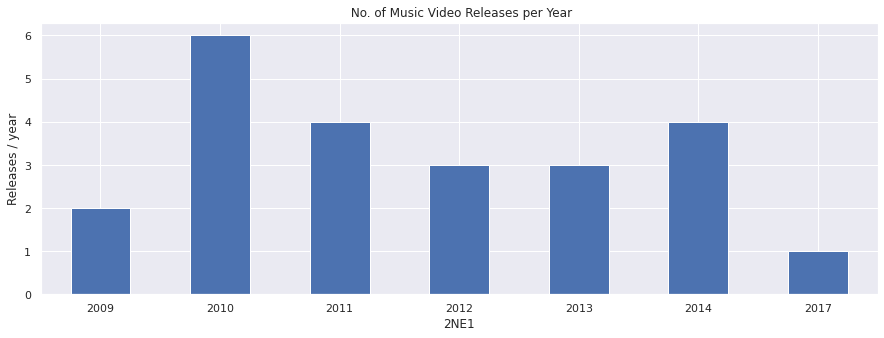

In [25]:
df = pd.read_csv('kpop_music_videos.csv')
df = df.drop_duplicates().dropna(subset=['Date', 'Artist', 'Release'])
df['Date_Year'] = pd.DatetimeIndex(df['Date']).year
df = df.drop('Date', axis=1)

df = df[['Artist', 'Release', 'Date_Year']]
df = df.sort_values('Artist')

# Make the lowercase artists to uppercase to be uniform
def all_upper(row):
    artist=row[0]
    return artist.upper()

df['Artist'] = df.apply(all_upper, axis=1)
artists = df.groupby(['Artist', 'Release'])

# Make a multi-Index
df = artists.apply(lambda a: a[:])

# Change the kpop_artist in uppercase which kpop group or artist you want to see...
kpop_artist = '2NE1'
df.loc[kpop_artist, 'Date_Year'].value_counts().sort_index().plot(kind='bar', title =" No. of Music Video Releases per Year", figsize=(15, 5))
plt.xticks(rotation='horizontal')
plt.xlabel(kpop_artist)
plt.ylabel("Releases / year")

In [26]:
# Kpop Artists in ascending order
df['Artist'].unique()

array(['(G)I-DLE', '100%', '100% V', '101', '10X10', '14U', '15&', '1NB',
       '1PS', '1PUNCH', '1TEAM', '1THE9', '1TYM', '2000WON', '24HOURS',
       '24K', '2AM', '2EYES', '2NE1', '2PM', '2Z', '3YE', '4CARAT', '4L',
       '4MEN', '4MINUTE', '4TEN', '5DOLLS', '5TION', '5URPRISE', '8EIGHT',
       '9MUSES', '9MUSES A', 'A TRAIN TO AUTUMN', 'A-DAILY', 'A-JAX',
       'A-PRINCE', 'A-SEED', 'A.C.E', 'A.CIAN', 'A.DE', 'A.H.H.A',
       'A.KOR', 'A.KOR BLACK', 'A.SOME', 'A.T.O', 'A6P', 'AB6IX', 'ABRY',
       'AFTER SCHOOL', 'AFTER SCHOOL BLUE', 'AFTER SCHOOL RED', 'AGIRLS',
       'AGUST D', 'AILEE', 'AIRISU', 'AKMU', 'ALEXA', 'ALICEWHITE',
       'ALIKE', 'ALLSTAR', 'ALPHABAT', 'AMBER LIU', 'ANS', 'ANYWAY',
       'AOA', 'AOA BLACK', 'AOA CREAM', 'APEACE', 'APINK', 'APPLE.B',
       'APRIL', 'AQUA', 'ARGON', 'ARIAZ', 'AS ONE', 'ASHA', 'ASHGRAY',
       'ASTIN', 'ASTRO', 'ATEEZ', 'AWEEK', 'AWESOME BABY', 'AZM', 'B.A.P',
       'B.I.G', 'B.O.Y', 'B1A4', 'BABA', 'BABY BOO', 'BADKIZ', 'BAE